Objective:
- To explore variables which drive used cars' prices

In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")

C:\Users\Lakki\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('C:\\Personal Documents\\PYTHON exercise\\Used Cars')

In [3]:
df = pd.read_csv('vehicles.csv')

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
print(df.columns,'\n',df.shape)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object') 
 (426880, 26)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### Missing Values

In [7]:
# Preview number of missing values and records

print(df.isnull().sum().sort_values())
print(df.shape)

id                   0
url                  0
region               0
region_url           0
price                0
state                0
image_url           68
posting_date        68
description         70
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
lat               6549
long              6549
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
county          426880
dtype: int64
(426880, 26)


In [8]:
# Remove some variables due to many record missing and not relevant to objective.

columns = ['county','size','url','id','region_url','image_url','VIN','lat','long','description',
           'state', 'posting_date','region','model', 'title_status']
df_clean = df.drop(columns=columns, axis=1)

In [9]:
# Fill numerical variables by mean and categorical by mode.

for i in df_clean:
    if df_clean[i].dtypes == 'float64':
        df_clean[i] = df_clean[i].fillna(df_clean[i].mean()) 
    if df_clean[i].dtypes == 'object':
        df_clean[i] = df_clean[i].fillna(df_clean[i].mode()[0])
df_clean['year'] = df_clean['year'].astype(int)

print('Missing Values are: \n' ,df_clean.isnull().sum())

Missing Values are: 
 price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64


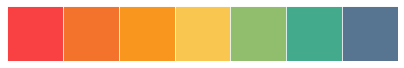

In [10]:
# Define color for visualization

color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

### Outliers

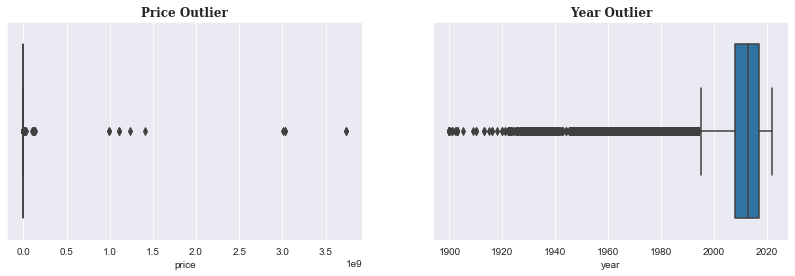

In [11]:
# Boxplot to illustrate outlier for price and year

fig = plt.figure(figsize=(14,4))
g = gs.GridSpec(1,2, figure=fig)
a = plt.subplot(g[0,0])
plt.title('Price Outlier', family='Serif', weight='bold',size=12)
sns.boxplot(data=df_clean, x='price')

b = plt.subplot(g[0,1])
plt.title('Year Outlier', family='Serif', weight='bold', size=12)
sns.boxplot(df_clean['year'])
plt.show()

In [12]:
# Define function to remove records which are outlier(above upper and below lower boundary)

def outlier (df, feature):
    Q1, Q3 = np.percentile(df[feature],[25,75])
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    high_lim = Q3 + 1.5 * IQR
    return low_lim, high_lim
p_lower, p_higher = outlier(df_clean, 'price')
y_lower, y_higher = outlier(df_clean, 'year')


df_clean = df_clean[(df_clean['price'] > p_lower) & (df_clean['price'] < p_higher)]
df_clean = df_clean[(df_clean['year'] > y_lower) & (df_clean['year'] < y_higher)]

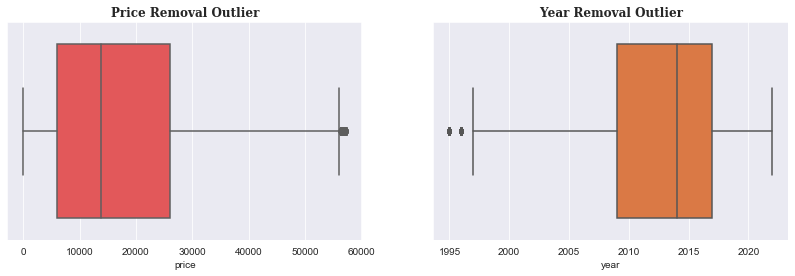

In [13]:
# Preview 'price' & 'year' after removing outliers

plt.figure(figsize=(14,4))
a = plt.subplot(g[0,0])
plt.title('Price Removal Outlier', family='Serif', weight='bold',size=12)
sns.boxplot(data=df_clean, x='price', color=color[0])

b = plt.subplot(g[0,1])
plt.title('Year Removal Outlier', family='Serif', weight='bold', size=12)
sns.boxplot(df_clean['year'], color=color[1])
plt.show()

### Visualization

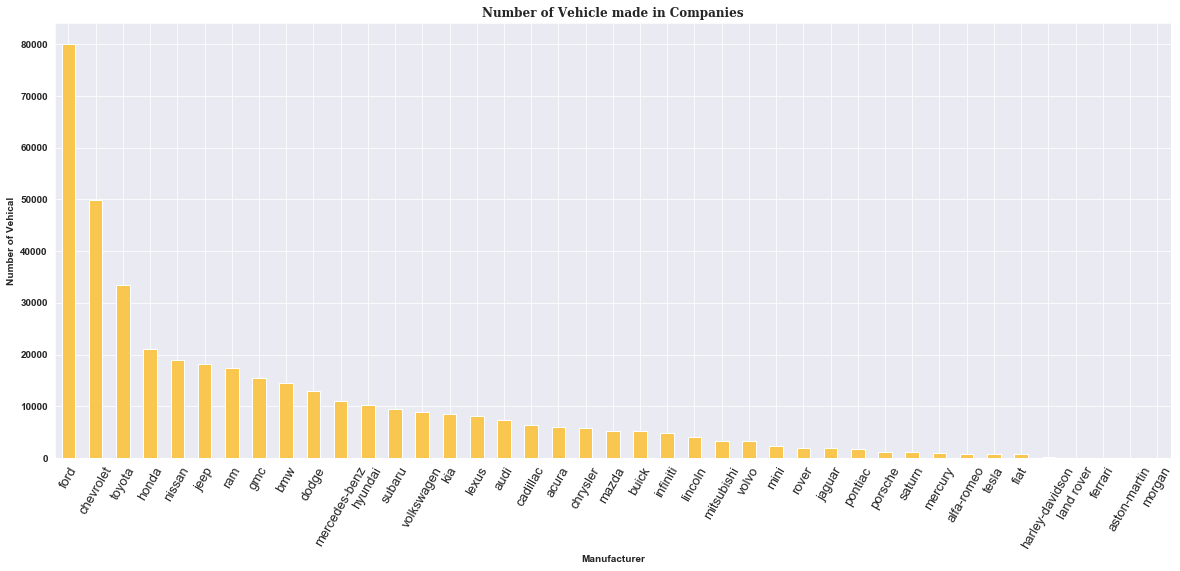

In [14]:
plt.figure(figsize=(20,8))
plt.title('Number of Vehicle made in Companies', family='Serif', weight='bold', size=12)
df_clean['manufacturer'].value_counts().plot(kind='bar', color=color[3])
plt.xticks(rotation = 60, fontsize=13)
plt.yticks(weight='bold')
plt.xlabel('Manufacturer', weight='bold')
plt.ylabel('Number of Vehical', weight='bold')
plt.show()

In [15]:
maker = ['ford','chevrolet','toyota','honda','nissan','jeep']
df_maker = df_clean[df_clean['manufacturer'].isin(maker)]

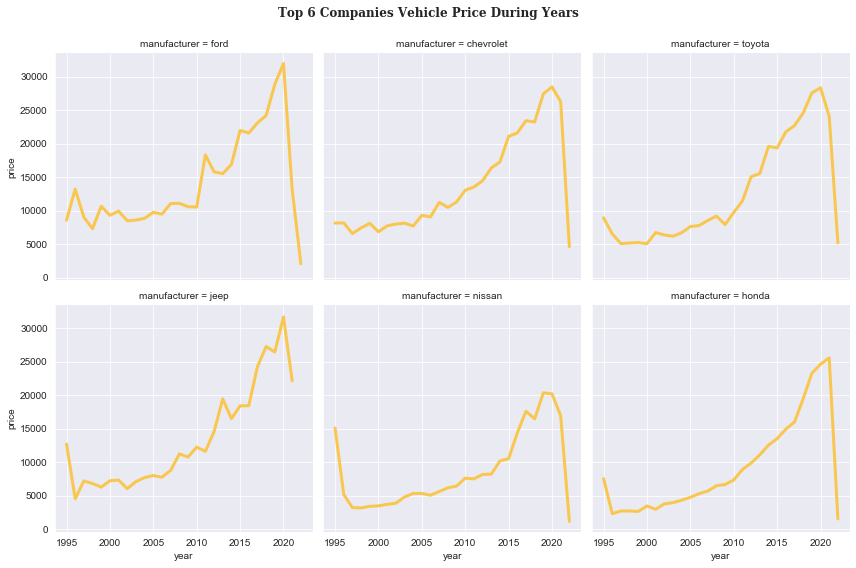

In [16]:
mk = sns.relplot(data=df_maker, x='year', y='price', col='manufacturer', kind='line', col_wrap=3,
           color=color[3], ci=None, height=4, linewidth=3, aspect=1)
mk.fig.suptitle('Top 6 Companies Vehicle Price During Years', weight='bold', family='Serif', size=12)
mk.fig.subplots_adjust(top=0.9)
plt.show()

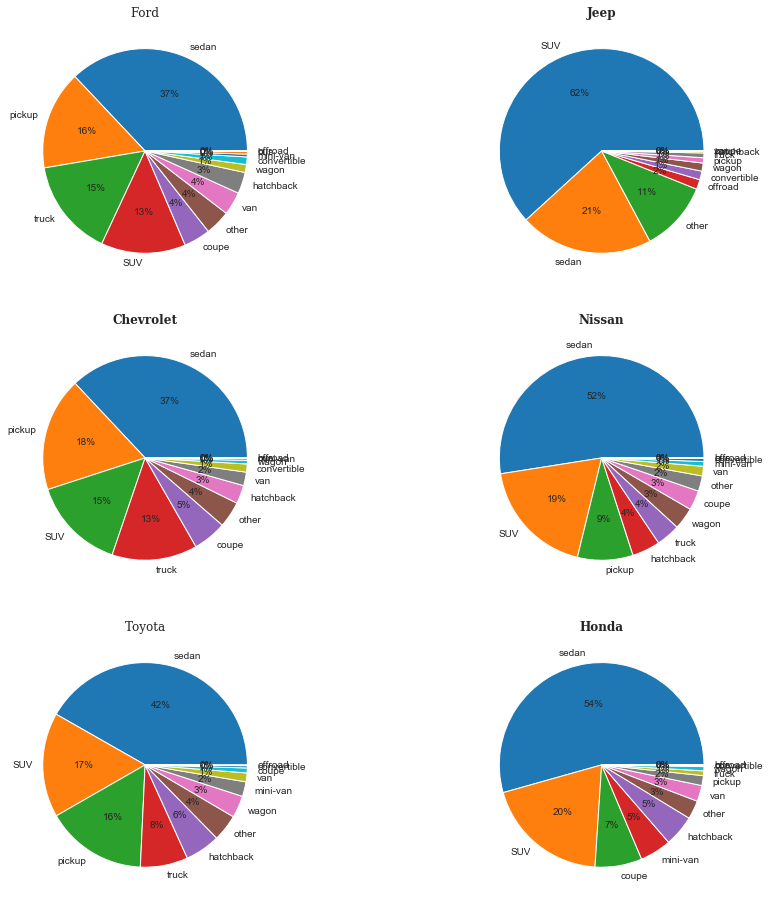

In [17]:
# Manufacturers made different types of vehical

fig = plt.figure(figsize=(15,16))
g = gs.GridSpec(3,2, figure=fig)
auto = '%.0f%%'

a = plt.subplot(g[0,0])
plt.title('Ford',  weight='bold', family='Serif', size=12)
df_clean['type'][df_clean['manufacturer'] == 'ford' ].value_counts().plot(kind='pie', title='Ford', autopct = auto)
plt.axis('off')

b = plt.subplot(g[1,0])
plt.title('Chevrolet', weight='bold', family='Serif', size=12)
df_clean['type'][df_clean['manufacturer'] == 'chevrolet' ].value_counts().plot(kind='pie', autopct=auto)
plt.axis('off')

c = plt.subplot(g[2,0])
plt.title('Toyota', family='Serif', weight='bold', size=12)
df_clean['type'][df_clean['manufacturer'] == 'toyota'].value_counts().plot(kind='pie', title='Toyota', autopct=auto)
plt.axis('off')

d = plt.subplot(g[0,1])
plt.title('Jeep', family='Serif', weight='bold', size=12)
df_clean['type'][df_clean['manufacturer'] == 'jeep'].value_counts().plot(kind='pie', autopct=auto)
plt.axis('off')

e = plt.subplot(g[1,1])
plt.title('Nissan', family='Serif', weight='bold', size=12)
df_clean['type'][df_clean['manufacturer'] == 'nissan'].value_counts().plot(kind='pie', autopct=auto)
plt.axis('off')

f = plt.subplot(g[2,1])
plt.title('Honda', family='Serif', weight='bold', size=12)
df_clean['type'][df_clean['manufacturer'] == 'honda'].value_counts().plot(kind='pie', autopct=auto)
plt.axis('off')

plt.show()

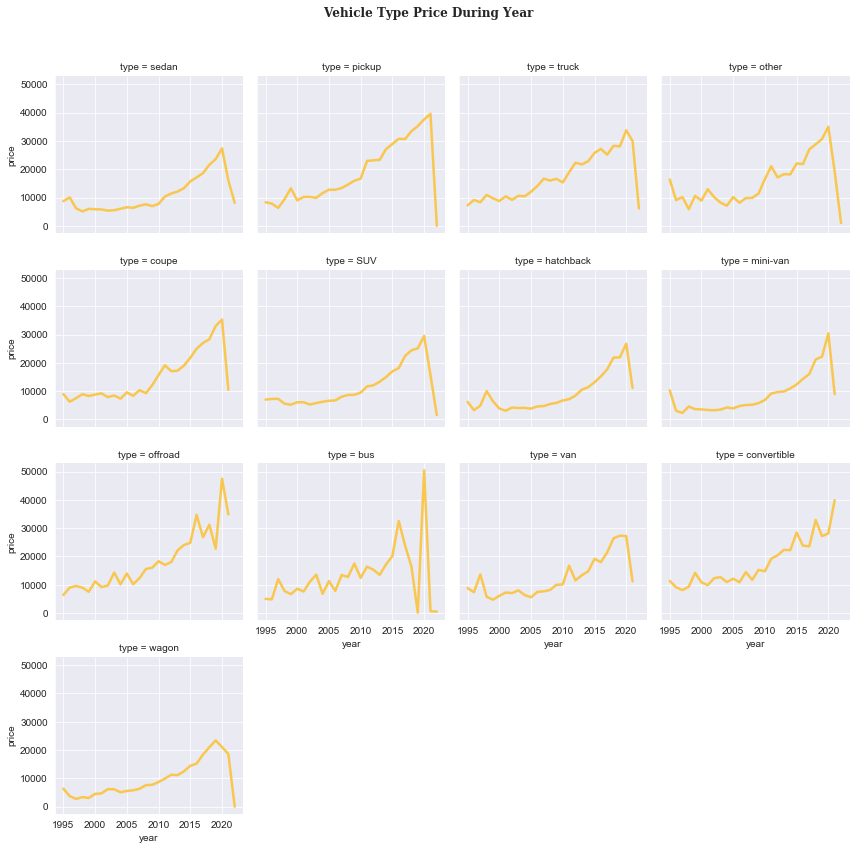

In [18]:
l = sns.relplot(data=df_clean, y='price', x='year', kind='line', col='type' ,col_wrap=4,
           height=3, linewidth=2.5, aspect=1, ci=None, color=color[3])
l.fig.suptitle('Vehicle Type Price During Year', family='Serif', weight='bold', size=12)
l.fig.subplots_adjust(top=0.9)
plt.show()

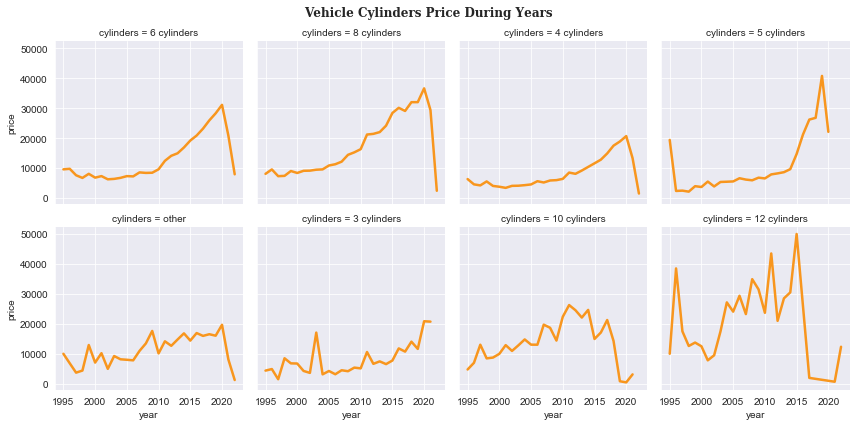

In [19]:
re = sns.relplot(data=df_clean, x='year', y='price', kind='line',col='cylinders', col_wrap=4,
           height=3, aspect=1, linewidth=2.5, ci=None, color=color[2])
re.fig.suptitle('Vehicle Cylinders Price During Years', family='Serif', weight='bold',size=12)
re.fig.subplots_adjust(top=0.9)
plt.show()

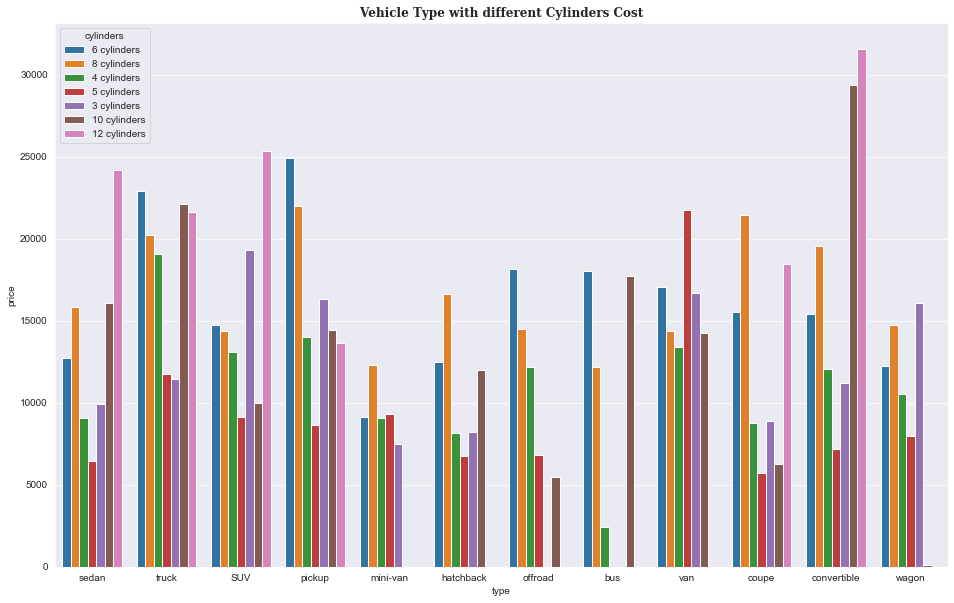

In [20]:
df_bar = df_clean[(df_clean['type'] != 'other') & (df_clean['cylinders'] != 'other') & (df_clean['transmission'] != 'other')]
plt.figure(figsize=(16,10))
plt.title('Vehicle Type with different Cylinders Cost', family='Serif', weight='bold', size=12)
sns.barplot(data=df_bar, y='price', x='type', hue='cylinders',ci=None)
plt.show()

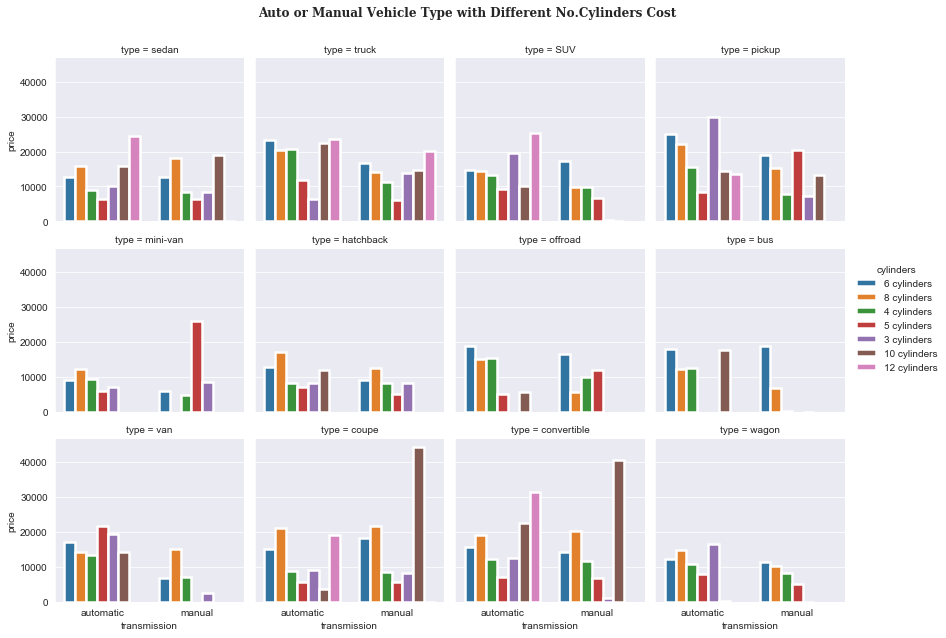

In [21]:
ct = sns.catplot(data=df_bar, y='price', x='transmission', col='type', hue='cylinders', kind='bar', 
            col_wrap=4, height=3, aspect=1, linewidth=2.5, ci=None)
ct.fig.suptitle('Auto or Manual Vehicle Type with Different No.Cylinders Cost', family='Serif',
               weight='bold', size=12)
ct.fig.subplots_adjust(top=0.9)
plt.show()

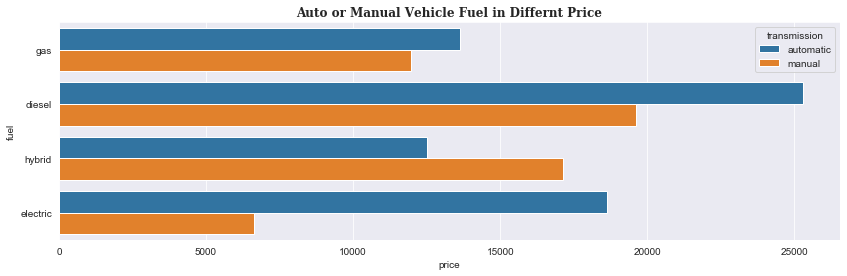

In [22]:
plt.figure(figsize=(14,4))
data = df_clean[(df_clean['fuel'] != 'other') & (df_clean['transmission'] != 'other')]
plt.title('Auto or Manual Vehicle Fuel in Differnt Price', family='Serif', weight='bold', size=12)
sns.barplot(data=data, y='fuel', x='price', hue='transmission',ci=None)
plt.show()

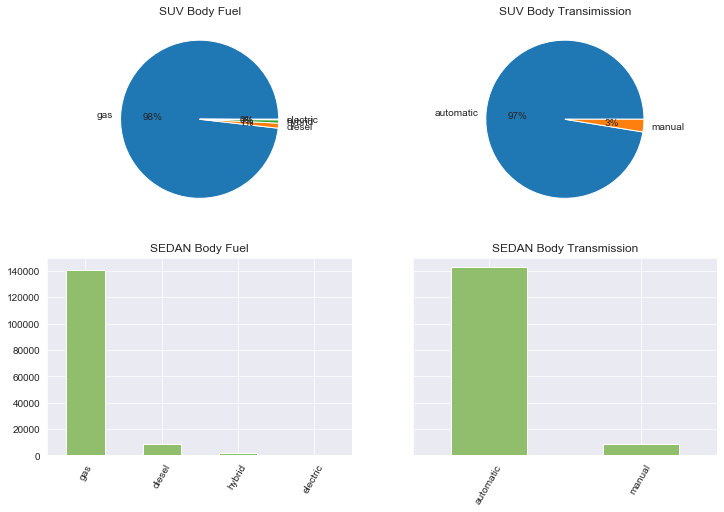

In [23]:
# Fecth out only Sedan and SUV vehical type

plt.figure(figsize=(12,8))

plt.subplot(221)
data['fuel'][data['type'] == 'SUV'].value_counts().plot(kind='pie', title='SUV Body Fuel', autopct=auto)
plt.axis('off')

plt.subplot(222)
data['transmission'][data['type'] == 'SUV'].value_counts().plot(kind='pie', title='SUV Body Transimission', autopct=auto)
plt.axis('off')

plt.subplot(223)
ax1 = data['fuel'][data['type'] == 'sedan'].value_counts().plot(kind='bar', title='SEDAN Body Fuel', color=color[4])
plt.xticks(rotation=60)

plt.subplot(224, sharey=ax1)
ax2 = data['transmission'][data['type'] == 'sedan'].value_counts().plot(kind='bar', 
                                                                        title='SEDAN Body Transmission', color=color[4])
plt.xticks(rotation=60)

plt.show()

In [24]:
# Categorical data transformation for predictive models (further study)

lb = LabelEncoder()

for i in df_clean:
    if df_clean[i].dtypes == 'object':
        df_clean[i] = lb.fit_transform(df_clean[i])
        
df_clean.head(3)

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,6000,2011,12,2,5,2,98043.331443,0,0,9,10
1,11900,2011,12,2,5,2,98043.331443,0,0,9,10
2,21000,2011,12,2,5,2,98043.331443,0,0,9,10


In [25]:
df_clean.corr()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
price,1.000000,0.485493,-0.038053,0.125959,0.229375,0.004185,-0.188773,0.330810,-0.059670,-0.003066,-0.033862
year,0.485493,1.000000,-0.008325,0.133781,-0.037773,0.166270,-0.271036,0.274300,-0.044927,-0.029249,-0.018444
manufacturer,-0.038053,-0.008325,1.000000,-0.015139,-0.139555,-0.016731,-0.000399,-0.002911,-0.047706,0.038925,0.002939
condition,0.125959,0.133781,-0.015139,1.000000,0.093147,0.078436,-0.043674,0.166422,-0.039838,0.062663,0.023640
cylinders,0.229375,-0.037773,-0.139555,0.093147,1.000000,-0.031808,0.013062,0.113234,-0.091925,0.059000,0.053488
fuel,0.004185,0.166270,-0.016731,0.078436,-0.031808,1.000000,-0.098033,0.268394,0.023991,-0.097965,-0.067794
odometer,-0.188773,-0.271036,-0.000399,-0.043674,0.013062,-0.098033,1.000000,-0.148593,-0.025512,0.029842,0.019281
transmission,0.330810,0.274300,-0.002911,0.166422,0.113234,0.268394,-0.148593,1.000000,0.044672,-0.025473,-0.053242
drive,-0.059670,-0.044927,-0.047706,-0.039838,-0.091925,0.023991,-0.025512,0.044672,1.000000,0.032325,-0.071297
type,-0.003066,-0.029249,0.038925,0.062663,0.059000,-0.097965,0.029842,-0.025473,0.032325,1.000000,0.123772


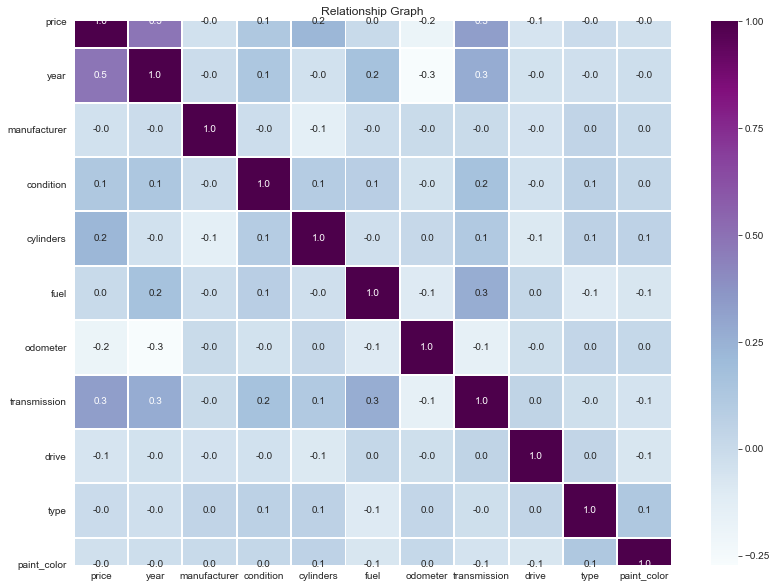

In [26]:
plt.figure(figsize=(14,10))
plt.title('Relationship Graph')
sns.heatmap(df_clean.corr(), linewidth=1, annot=True, cmap='BuPu', square=True, fmt='.1f')
plt.show()